## MOwNiT
### Julia Smerdel, ZadanieDomowe9

#### Zad1. Rozwiązanie układu trzema metodami.

In [1]:
using LinearAlgebra, DataFrames

x = rand(1000)
A = rand(1000, 1000)
b = A * x
df = DataFrame(Method=String[], Time=Float64[], Difference=Float64[])

#first time with compilation
inv(A)*b
A\b
factorize(A)\b

function vectorDifference(method)
    return sqrt(dot(method, method))
end



###### inv() ######
invTime = @elapsed inv(A) * b
invDifference = x - inv(A) * b
invVector = vectorDifference(invDifference)
push!(df, ("inv()", invTime, invVector))


##### \ #####
slashTime = @elapsed A\b
slashDifference = x - A\b
slashVector = vectorDifference(slashDifference)
push!(df, ("Slash", slashTime, slashVector))

###### factorize() ######
factTime = @elapsed factorize(A)\b
factDifference = x - factorize(A)\b
factVector = vectorDifference(factDifference)
push!(df, ("factorize()", factTime, factVector))

df

Row,Method,Time,Difference
,String,Float64,Float64
1,inv(),0.0954897,5.54252e-10
2,Slash,0.0178863,3.0489e-10
3,factorize(),0.0085409,3.0489e-10


#### Zad2. Faktoryzacja danych z poprzednich laboratoriów.

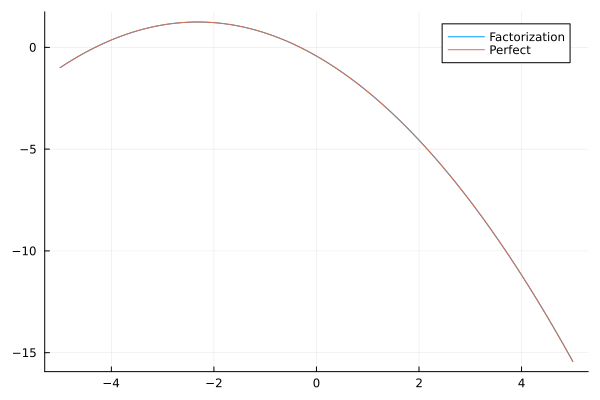

In [2]:
using CSV, Polynomials, Plots
data = CSV.read("ecg_data.csv", delim = ";", DataFrame)
x = data.signalN
y = data.signalV
A = zeros(73, 3)
A[:,1]=x.^2
A[:,2]=x
A[:,3]=ones(73)

#factorizing
AF = factorize(A)
idk = AF.R\((Transpose(AF.Q)*y)[1:3])
poly = Polynomial(idk)
perfect = fit(x, y, 2)
xs = -5:5

plot(poly, extrema(xs)..., label="Factorization")
plot!(perfect, extrema(xs)..., label="Perfect")


#### Zad3. Praktyczne zastosowanie faktoryzacji.

Użycie faktoryzacji QR do znajdowania wartości własnych.

1. Użycie faktoryzacji QR
2. Wymnożenie macierzy ortogonalnej oraz trójkątnej górnej.

$A_0 = A$

$A_{k+1} = R_kQ_k = Q^-1_kQ_kR_kQ_k = Q^-1_kA_kQ_k = Q^T_kA_kQ_k$

In [3]:
function eigenValues(A, precision)
    for i in 1:precision
        AF = qr(A)
        A = Transpose(AF.Q)*A*AF.Q
    end
    
    val = [A[i, i] for i in 1:size(A, 1)]
end

eigenValues (generic function with 1 method)

Mozemy zastosowac twierdzenie Gershgorina, ktore estymuje wartosci wlasne macierzy z liczbami zespolonymi, 
poprzez wyznaczanie dyskow, w ktorych beda znajdowac sie wartosci wlasne:


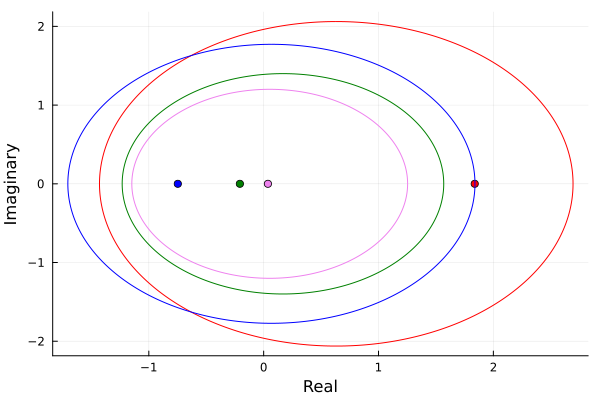

In [4]:
function disksFun(A)
    disks = []
    for i in 1:size(A, 1)
        ans = 0
        for j in 1:size(A, 2)
            if j != i
                ans += abs(A[i, j])
            end
        end
        push!(disks, (A[i, i], ans))
    end
    disks
end
    
function drawCircle(h,k,r)
    theta = 0:0.01:2*pi
    h .+ r*sin.(theta), k.+ r*cos.(theta)
end
    
function complexFun(ev)
    return [(e,0) for e in ev]
end
    
    
A = rand(4, 4)
ev = eigenValues(A, 5)
complex = complexFun(ev)
disks = disksFun(A)
colors = [:red, :blue, :green, :violet]
a = scatter(
    xlabel = "Real", 
    ylabel = "Imaginary",
    )
    
for i in 1:size(disks,1)
    d = disks[i]
    scatter!(complex[i],
        color = colors[i],
        fillalpha = 0.25,
        label = ""
    )
    plot!(drawCircle(d[1],0,d[2]), 
        color = colors[i], 
        fillalpha = 0.25, 
        label = ""
    )
end
a 
